In [1]:
# Step 1: Load the dataset
from sklearn.datasets import load_iris



iris = load_iris()
X = iris.data
y = iris.targe


# Step 3: No preprocessing needed assuming the dataset is clean


In [7]:
# Step 2: Explore the data (optional)
import pandas as pd

# Load the Iris dataset into a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows of the dataset
print(iris_df.head())

# Display summary statistics of the dataset
print(iris_df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

In [4]:
#Step 4: Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
# Step 5: Choose a model
from sklearn.linear_model import LogisticRegression

# Step 6: Train the model
logistic_regression = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
logistic_regression.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [8]:
# Step 8: Make predictions (optional)
# Step 8: Make predictions
# Predict the target values for the test set
y_pred = logistic_regression.predict(X_test)

# Display the predicted target values
print("Predicted target values:")
print(y_pred)


Predicted target values:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


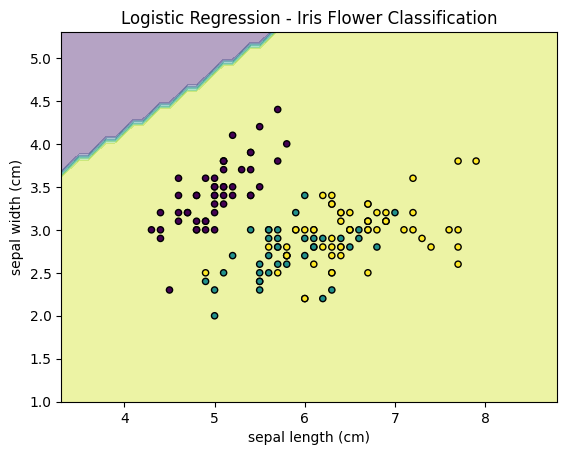

In [14]:
# Step 9: Visualize results


import matplotlib.pyplot as plt
import numpy as np

# Define the feature names
feature_names = iris.feature_names

# Select two features for visualization (e.g., sepal length and sepal width)
feature1_index = 0  # Sepal length
feature2_index = 1  # Sepal width
# Create meshgrid for all four features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the target values for the meshgrid
Z = logistic_regression.predict(np.c_[xx.ravel(), yy.ravel(), 
                                       np.full_like(xx.ravel(), X[:, 2].mean()), 
                                       np.full_like(xx.ravel(), X[:, 3].mean())])

# Reshape the predictions to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the actual data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

# Set labels and title
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Logistic Regression - Iris Flower Classification')

# Show the plot
plt.show()
